In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU Available:",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number of GPU Available: 1


In [3]:
train_path = 'data/train'
valid_path = 'data/test'

In [4]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)
valid_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['paper','rock','scissors'],batch_size=10)


Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [5]:
imgs,labels = next(train_batches)

In [6]:
def plotimages(image_arr):
    fig,axes= plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

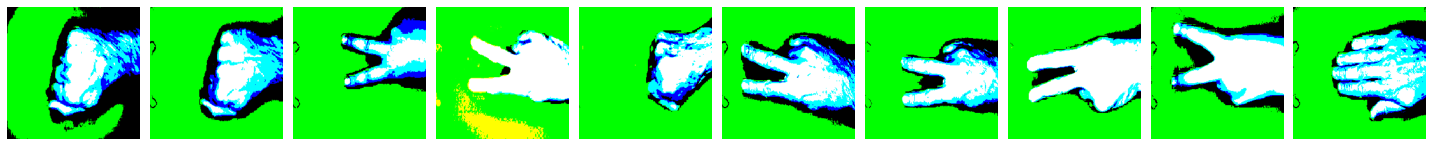

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [7]:
plotimages(imgs)
print(labels)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 602115    
Total params: 621,507
Trainable params: 621,507
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
t1_start = time.process_time() 
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=1)
t1_stop = time.process_time()
print("Elapsed time during the training in seconds:", t1_stop-t1_start) 

Epoch 1/10
219/219 [==============================] - 12s 54ms/step - loss: 0.0456 - accuracy: 0.9913 - val_loss: 0.0239 - val_accuracy: 0.9963
Epoch 2/10
219/219 [==============================] - 12s 56ms/step - loss: 0.0566 - accuracy: 0.9909 - val_loss: 0.0083 - val_accuracy: 0.9982
Epoch 3/10
219/219 [==============================] - 12s 55ms/step - loss: 0.0602 - accuracy: 0.9899 - val_loss: 0.0280 - val_accuracy: 0.9931
Epoch 4/10
219/219 [==============================] - 12s 56ms/step - loss: 0.0073 - accuracy: 0.9968 - val_loss: 7.7483e-04 - val_accuracy: 0.9995
Epoch 5/10
219/219 [==============================] - 12s 56ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 6.9236e-05 - val_accuracy: 1.0000
Epoch 6/10
219/219 [==============================] - 13s 57ms/step - loss: 5.8784e-05 - accuracy: 1.0000 - val_loss: 2.3897e-05 - val_accuracy: 1.0000
Epoch 7/10
219/219 [==============================] - 13s 58ms/step - loss: 2.2608e-05 - accuracy: 1.0000 - val_loss: 1.

In [14]:
if os.path.isfile('./rps.h5') is False:
    model.save('rps.h5')

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpvi3eg89_\assets


In [8]:
model = tf.keras.models.load_model('rps.h5')